# Upper Confidence Bound (UCB)

## Importing the libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [6]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [8]:
import math
N = 10000 # number of row/users
d = 10  # number of ads/coloms
ads_selected = []  # total ads selected
numbers_of_selections = [0] * d # number of ads selected in each round for 10 ads ~ {Ni(n)}
sums_of_rewards = [0] * d # sums of rewards ~ {Ri(n)}
total_reward = 0  # total rewards accumilated
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] =  sums_of_rewards[ad] + reward
  total_reward = total_reward + reward

## Visualising the results

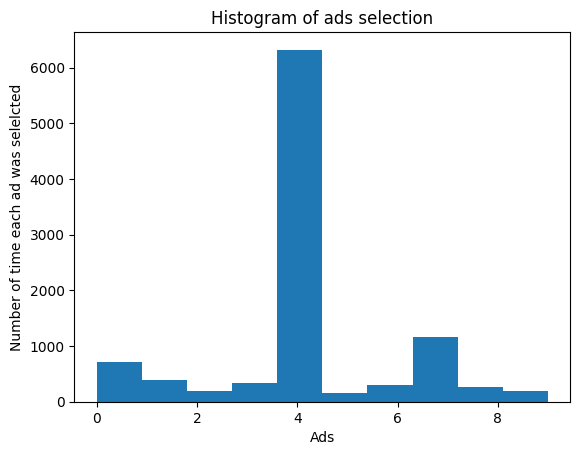

In [9]:
plt.hist(ads_selected)
plt.title("Histogram of ads selection")
plt.xlabel("Ads")
plt.ylabel("Number of time each ad was selelcted")
plt.show()